<a id="1"></a>
<p style="padding:10px;background-color:#686868;margin:0;color:#c6b9be;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">SMS_SPAM_CLASSIFICATION</p>

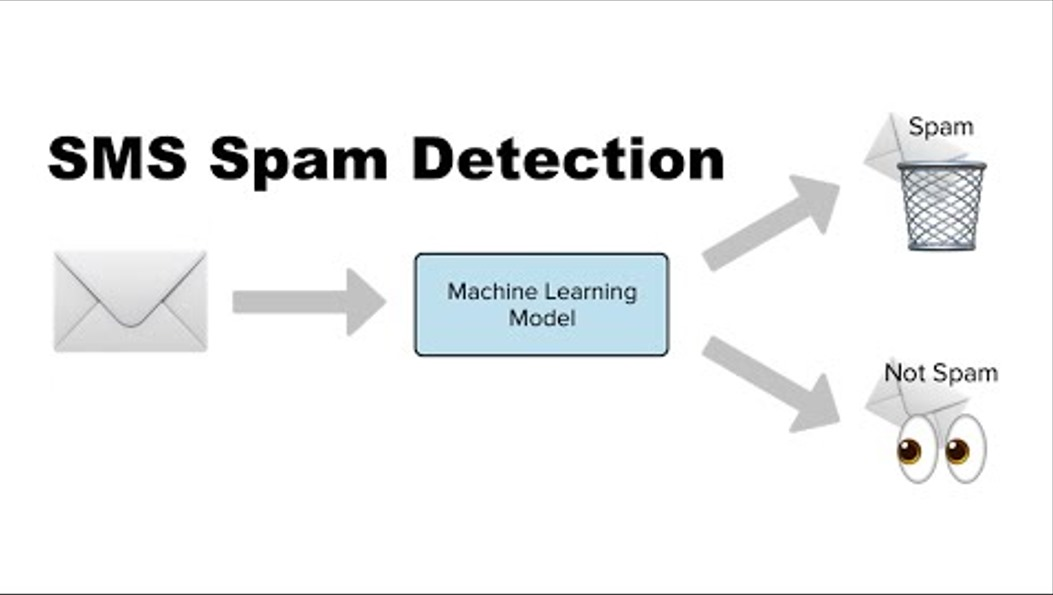

<a id="1"></a>  
 <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Downloads'

In [3]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace  =True)

In [5]:
df.shape

(5572, 2)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns = {'v1':'label','v2':'sms'},inplace =True)

In [8]:
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

label    0
sms      0
dtype: int64

In [10]:
df['label'].replace('ham',0, inplace=True)
df['label'].replace('spam',1, inplace=True)

In [11]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
# Data is imbalanced
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [13]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Seprating ham and spam message

In [14]:
spam_sms=df.loc[df['label']==1]
no_spam_sms=df.loc[df['label']==0]

In [15]:
spam_sms

,label,sms
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
no_spam_sms

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
spam_sms['len']=[len(x) for x in spam_sms['sms']]

In [21]:
spam_sms.head()

,label,sms,len
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [22]:
spamavg=spam_sms.len.mean()
spamavg

138.8661311914324

In [23]:
no_spam_sms['len'] = [len(x) for x in no_spam_sms["sms"]] 

In [24]:
no_spam_sms.head()

,label,sms,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
6,0,Even my brother is not like to speak with me. ...,77


In [25]:
spamavg=no_spam_sms.len.mean()
spamavg

71.02362694300518

In [26]:
df['length'] = df['sms'].apply(lambda x: len("".join([a for a in x if a.isdigit()]))) 
print (np.mean (df ['length'][df['label'] == 0]), np. mean (df['length'][df['label'] == 1])) 
print (df.head (20))

0.2992746113989637 15.759036144578314
    label                                                sms  length
0       0  Go until jurong point, crazy.. Available only ...       0
1       0                      Ok lar... Joking wif u oni...       0
2       1  Free entry in 2 a wkly comp to win FA Cup fina...      25
3       0  U dun say so early hor... U c already then say...       0
4       0  Nah I don't think he goes to usf, he lives aro...       0
5       1  FreeMsg Hey there darling it's been 3 week's n...       4
6       0  Even my brother is not like to speak with me. ...       0
7       0  As per your request 'Melle Melle (Oru Minnamin...       1
8       1  WINNER!! As a valued network customer you have...      19
9       1  Had your mobile 11 months or more? U R entitle...      13
10      0  I'm gonna be home soon and i don't want to tal...       0
11      1  SIX chances to win CASH! From 100 to 20,000 po...      22
12      1  URGENT! You have won a 1 week FREE membership ...     

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis (EDA)</p>

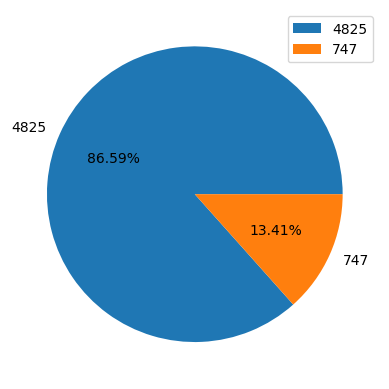

In [27]:
plt.pie(df.label.value_counts(), labels=df.label.value_counts(), autopct="%.2f%%")
plt.legend()
plt.show()

### Train Test split

In [30]:
cv = CountVectorizer()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df['sms'],df['label'], test_size = 0.25, random_state = 42 )

In [32]:
xtrain_vect=cv.fit_transform(x_train)
xtrain_vect

<4179x7441 sparse matrix of type '<class 'numpy.int64'>'
	with 55194 stored elements in Compressed Sparse Row format>

In [33]:
x_train

4281                                    U can call now...
585     Tell them u have a headache and just want to u...
4545    Never try alone to take the weight of a tear t...
3034    Raji..pls do me a favour. Pls convey my Birthd...
2758              What time. IÛ÷m out until prob 3 or so
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: sms, Length: 4179, dtype: object

In [34]:
y_train

4281    0
585     0
4545    0
3034    0
2758    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4179, dtype: int64

# Fitting and Transforming X_train using a Count Vectorizer with default parameters

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">DecisionTreeClassifier</span>

In [51]:
vectorizer = TfidfVectorizer (min_df=5)
x_train_vect = vectorizer.fit_transform (x_train) 
x_test_vect = vectorizer.transform(x_test) 

In [52]:
clf = DecisionTreeClassifier()
clf.fit (x_train_vect, y_train)

DecisionTreeClassifier()

In [53]:
y_predicted = clf.predict(x_test_vect)

In [54]:
roc_auc_score (y_test, y_predicted)

0.9090368582902841

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">RandomForestClassifier</span>

In [55]:
vectorizer = TfidfVectorizer (min_df=5)
x_train_vect = vectorizer.fit_transform (x_train) 
x_test_vect = vectorizer.transform(x_test)

In [56]:
clf = RandomForestClassifier()
clf.fit (x_train_vect, y_train)

RandomForestClassifier()

In [57]:
y_predicted = clf.predict(x_test_vect)

In [58]:
roc_auc_score (y_test, y_predicted)

0.9210499952086836

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">SVC</span>

In [59]:
vectorizer = TfidfVectorizer (min_df=5)
x_train_vect = vectorizer.fit_transform (x_train) 
x_test_vect = vectorizer.transform(x_test)

In [60]:
clf = SVC ()
clf.fit (x_train_vect, y_train)

SVC()

In [61]:
y_predicted = clf.predict(x_test_vect)

In [62]:
roc_auc_score (y_test, y_predicted)

0.9214659685863874

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">LogisticRegression</span>

In [63]:
vectorizer = TfidfVectorizer (min_df=5, ngram_range=(1,3)) 
x_train_transformed = vectorizer.fit_transform(x_train)  
x_test_transformed = vectorizer.transform (x_test) 

In [64]:
clf = LogisticRegression () 
clf.fit (x_train_transformed, y_train) 

LogisticRegression()

In [65]:
y_predictedl = clf. predict (x_test_transformed) 

In [66]:
roc_auc_score(y_test, y_predicted)

0.9214659685863874

In [1]:
scores = [ 0.9090368582902841, 0.9210499952086836, 0.9214659685863874, 0.9214659685863874]

Frame = pd.DataFrame({
    'Label': ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'LogisticRegression'],
    'Score': scores
})

Frame.sort_values(by='Score', ascending=False)

<IPython.core.display.Javascript object>

,Label,Score
2,SVC,0.921466
3,LogisticRegression,0.921466
1,RandomForestClassifier,0.921050
0,DecisionTreeClassifier,0.909037


# Conculsion: - The order of the ✅Best Models from top to bottom is:  SVC